# Airbnb listings Broward County, FL

Task 6.6 Timeseries

Contents:

1. Importing labraries and data
2. Creating dataframes with dates
3. Timeseries analysis - decomposition
4. Testing for stationarity
5. Autocorrelation
6. Stationarizing the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
df_airbnb = pd.read_csv(r'D:\CareerFoundry\Data Immersion\Task 6\AirBnB Broward County FL Data\02 Data\Prepared data\2021_09 Airbnb Broward County_separated date of last review.csv')

In [6]:
df_airbnb.head()

,property_id,collection_date,listing_name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review_day,last_review_month,last_review_year,last_review_month_year,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,-80.07285,distance_to_beach
0,57818,2021_09,Private house close to the beach!,275948,Hollywood,26.01670,-80.12437,Entire home/apt,191,2,...,1,8,2021,8/2021,0.56,1,359,14,-80.07285,0.05152
1,69824,2021_09,2 bd/2ba Oceanfront Condo,351303,Hallandale Beach,25.97641,-80.12052,Entire home/apt,110,30,...,27,3,2021,3/2021,0.05,2,201,1,-80.07285,0.04767
2,83449,2021_09,MARY POP APTS 2/1 APT SLEEP 5,454736,Dania Beach,26.03392,-80.14201,Entire home/apt,99,7,...,26,1,2020,1/2020,0.17,8,119,0,-80.07285,0.06916
3,105411,2021_09,House in the Ranches,532930,Southwest Ranches,26.04678,-80.36809,Entire home/apt,235,4,...,27,8,2012,8/2012,0.05,1,116,0,-80.07285,0.29524
4,129061,2021_09,MIAMI - LUXURY APARTMENT OVER BEACH,637272,Hollywood,25.99332,-80.11887,Entire home/apt,250,20,...,26,3,2021,3/2021,0.16,6,364,3,-80.07285,0.04602


In [4]:
df_airbnb['last_review_year'].value_counts(dropna = False)

2021    8328
1900    2450
2020     666
2019     292
2018     114
2017      65
2016      20
2015      11
2012       2
2014       2
Name: last_review_year, dtype: int64

In [7]:
# Creating a data frame for year 2021

df_2021 = df_airbnb[df_airbnb['last_review_year'] == 2021] 

In [8]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8328 entries, 0 to 11795
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   property_id                     8328 non-null   int64  
 1   collection_date                 8328 non-null   object 
 2   listing_name                    8328 non-null   object 
 3   host_id                         8328 non-null   int64  
 4   neighbourhood                   8328 non-null   object 
 5   latitude                        8328 non-null   float64
 6   longitude                       8328 non-null   float64
 7   room_type                       8328 non-null   object 
 8   price                           8328 non-null   int64  
 9   minimum_nights                  8328 non-null   int64  
 10  number_of_reviews               8328 non-null   int64  
 11  last_review                     8328 non-null   object 
 12  last_review_day                 8

In [9]:
df_2021['last_review_month_year'].value_counts(dropna = False)

9/2021     3535
8/2021     2086
7/2021     1109
6/2021      521
5/2021      381
4/2021      244
3/2021      208
2/2021      122
1/2021      121
10/2021       1
Name: last_review_month_year, dtype: int64

In [19]:
data = {'Date':['9/2021', '8/2021', '7/2021', '6/2021', '5/2021', '4/2021', '3/2021','2/2021','1/2021'  ], 
        'Property count':[3535, 2086, 1109, 521, 381, 244, 208, 122, 121]}

df_2021 = pd.DataFrame(data)
print(df_2021)

     Date  Property count
0  9/2021            3535
1  8/2021            2086
2  7/2021            1109
3  6/2021             521
4  5/2021             381
5  4/2021             244
6  3/2021             208
7  2/2021             122
8  1/2021             121


In [22]:
from datetime import datetime

df_2021['datetime'] = pd.to_datetime(df_2021['Date']) # Create a datetime column from 'Date'
df_2021 = df_2021.set_index('datetime') # Set the datetime as the index of the dataframe
df_2021.drop(['Date'], axis=1, inplace=True) # Drop the date column
df_2021.head()

,Property count
datetime,
2021-09-01,3535
2021-08-01,2086
2021-07-01,1109
2021-06-01,521
2021-05-01,381


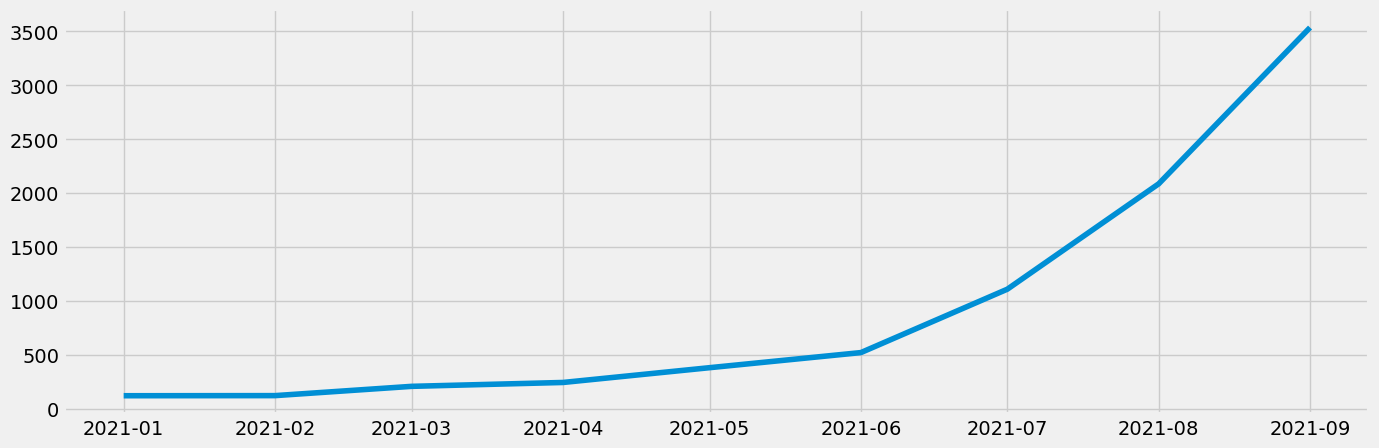

In [23]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_2021)

## 3. Time-series analysis: decomposition

In [27]:
import statsmodels.api as sm

# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_2021, model = 'additive')

ValueError: x must have 2 complete cycles requires 24 observations. x only has 9 observation(s)

# It looks like I need to have 2 full cycles of data to perform the decomposition. 
# I am going to try it below including last reviews dated for July, August and September 2021

In [3]:
df_2021_07_08_09 = pd.read_csv(r'D:\CareerFoundry\Data Immersion\Task 6\AirBnB Broward County FL Data\02 Data\Prepared data\airbnb dates jul aug sep 2021.csv')

In [4]:
df_2021_07_08_09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           89 non-null     object
 1   no-of_reviews  89 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [5]:
df_2021_07_08_09

,date,no-of_reviews
0,2021-07-01,15
1,2021-07-02,11
2,2021-07-03,14
3,2021-07-04,19
4,2021-07-05,36
...,...,...
84,2021-09-23,80
85,2021-09-24,77
86,2021-09-25,79
87,2021-09-26,180


In [6]:
from datetime import datetime

df_2021_07_08_09['datetime'] = pd.to_datetime(df_2021_07_08_09['date']) # Create a datetime column from 'date'
df_2021_07_08_09 = df_2021_07_08_09.set_index('datetime') # Set the datetime as the index of the dataframe
df_2021_07_08_09.drop(['date'], axis=1, inplace=True) # Drop the date column
df_2021_07_08_09.head()

,no-of_reviews
datetime,
2021-07-01,15
2021-07-02,11
2021-07-03,14
2021-07-04,19
2021-07-05,36


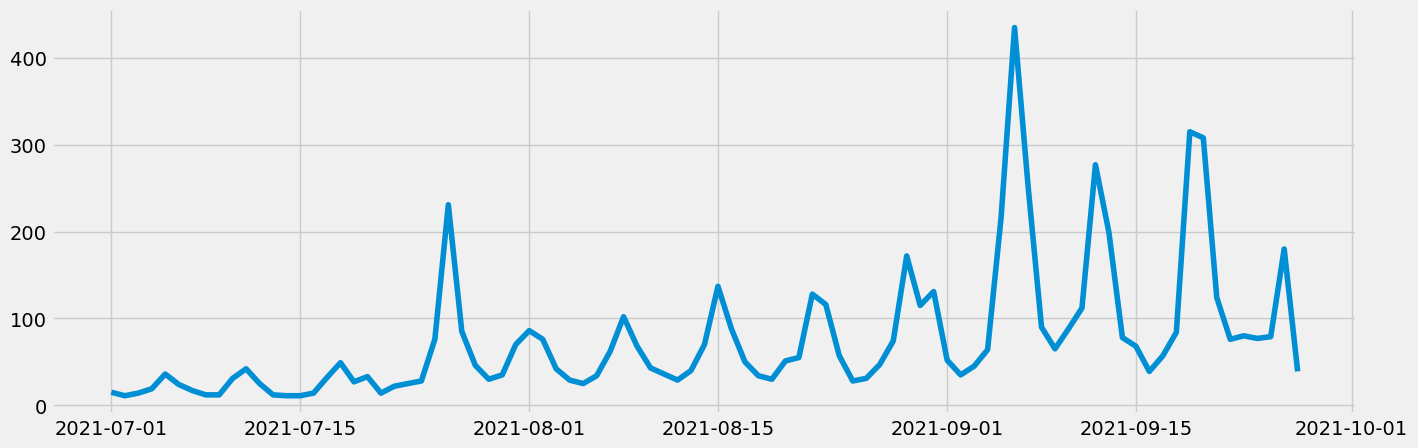

In [9]:
import statsmodels.api as sm
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_2021_07_08_09)

In [10]:
decomposition = sm.tsa.seasonal_decompose(df_2021_07_08_09, model = 'additive')

In [11]:
from pylab import rcParams # This defines a fixed size for all special charts.

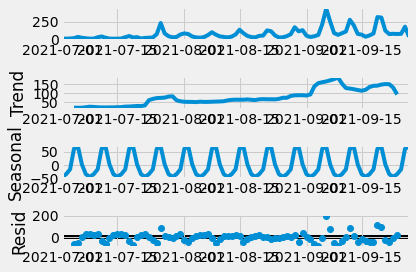

In [12]:
# Plot the separate components. 
# They will be split into three components: the underlying trend,, the seasonality, and the noise

decomposition.plot()
plt.show()

# 4. Testing for stationarity

The trend in the set is visibly upward which indicates a non-stationarity. The Dickey_Fuller test provides additional prove if this is the case.

In [13]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
           result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_2021_07_08_09['no-of_reviews'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.832094
p-value                         0.364648
Number of Lags Used             5.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


Comment:

At the significance level of 5% and its value of -2.897048 the test statistic resulted in a smaller value of -1.832094 which means that I can't reject the null hypothesis. The Dickey-Fuller test proved that there is a unit root in the data which means the data in non-stationary. 

## 5 Autocorrelation

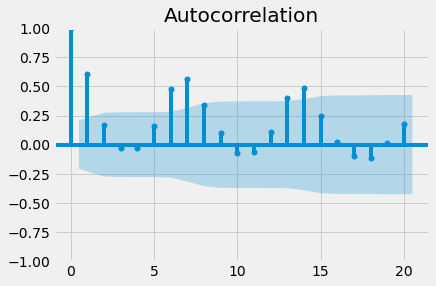

In [14]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_2021_07_08_09)
plt.show()

The vertical lines represents the lags and the blue area is the confidence inteval. There are some lines that go above the blue edge which meand that those lags are correlated with each other and that makes the data non-stationary as proved int the Dickey-Fuller test.

## 6 Stationarizaing the data

In [15]:
data_diff = df_2021_07_08_09 - df_2021_07_08_09.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [16]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [19]:
data_diff.head()

,no-of_reviews
datetime,
2021-07-02,-4.0
2021-07-03,3.0
2021-07-04,5.0
2021-07-05,17.0
2021-07-06,-12.0


In [20]:
data_diff.columns

Index(['no-of_reviews'], dtype='object')

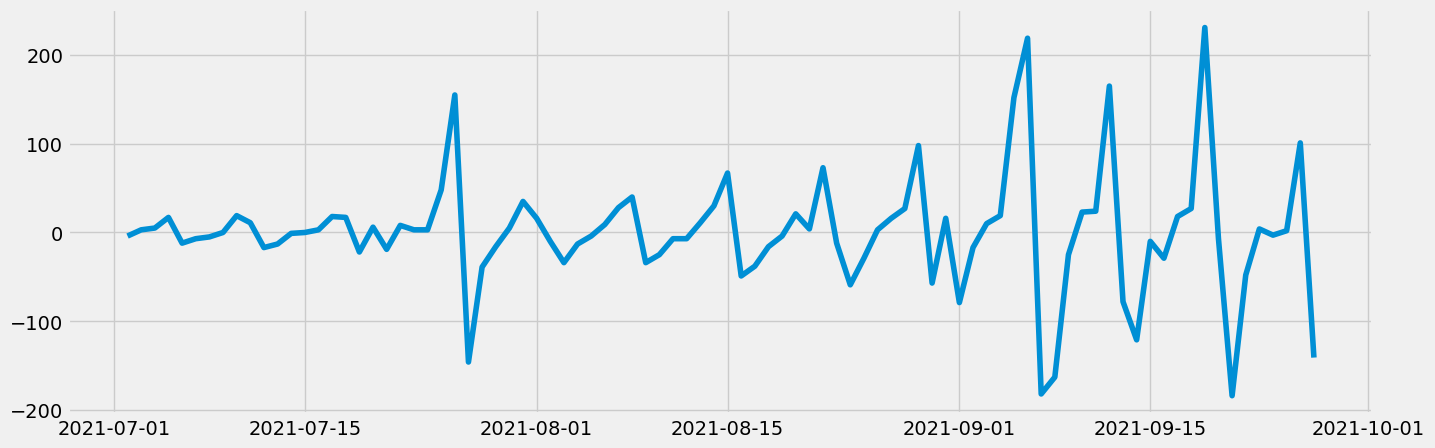

In [21]:

# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [22]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.011670e+01
p-value                        9.681949e-18
Number of Lags Used            4.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (1%)           -3.511712e+00
Critical Value (5%)           -2.897048e+00
Critical Value (10%)          -2.585713e+00
dtype: float64


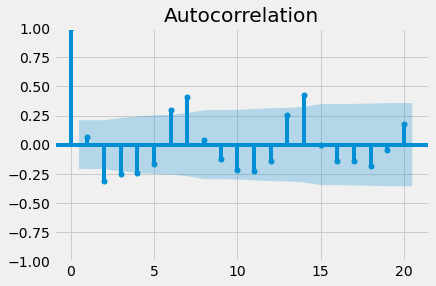

In [23]:
plot_acf(data_diff)
plt.show()